In [1]:
import statsmodels.api as sm 
from scipy.stats import uniform, beta, chi2, gamma
import numpy as np
from scipy.integrate import quad

from matplotlib import pyplot as plt
import seaborn as sns

# Part 1  

We want to visually inspect if samples could have come from a Beta distribution with parameters (10, 12). To do this you will plot a QQ plot of the sample percentiles (of the
samples) against the exact percentiles of Beta (10, 12). Do this for samples generated in the following way:

(a)  samples1 = uniform.rvs(size=10000)

(b) samples2 = beta.rvs(a=3, b=12, size=10000)

(c) samples3 = beta.rvs(a=11, b=3, size=10000)

From each of these three QQ plots, we will identify one feature of the data which does not correspond to the
Beta (10, 12) model (e.g. the samples have a larger/smaller ... than the model).

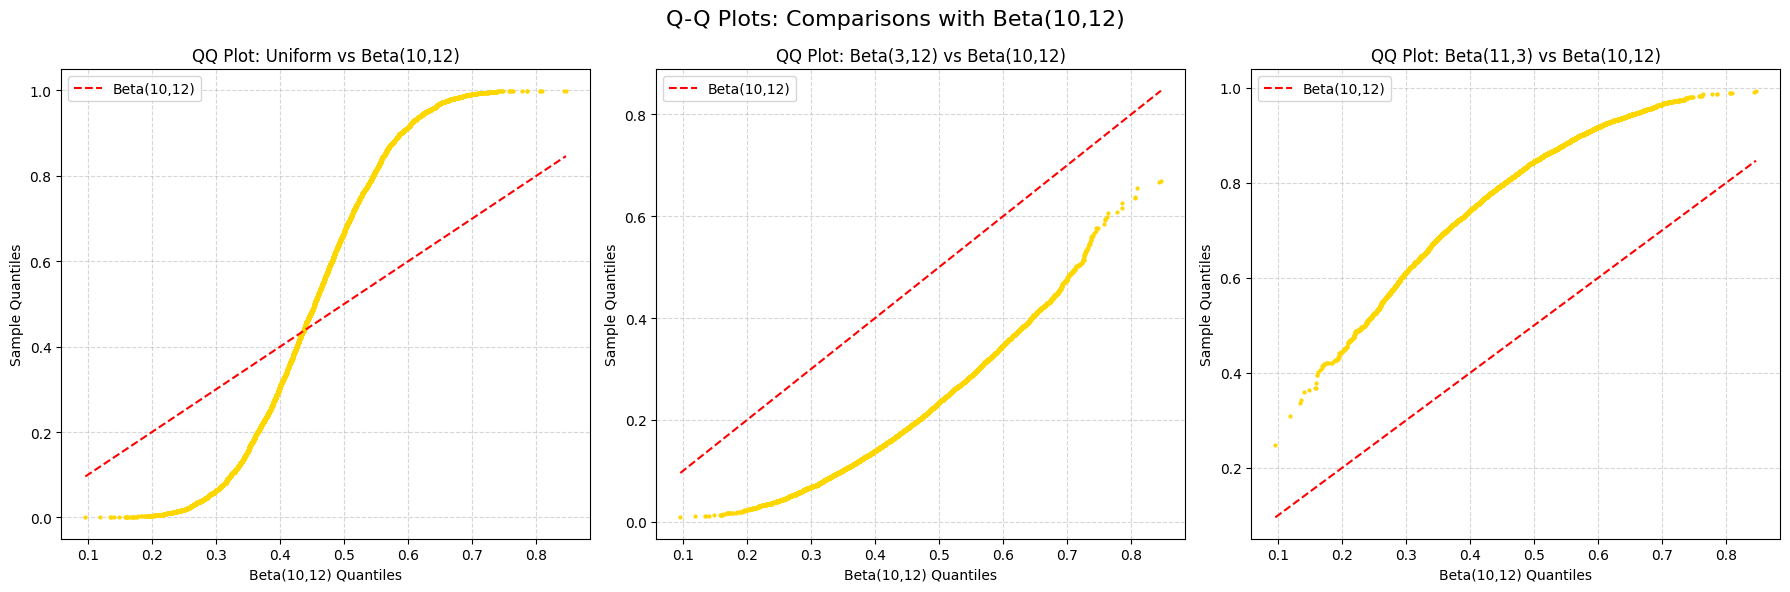

In [ ]:
sample_size = 10000
percentiles = np.linspace(0, 100, 10000)
 
samples1 = uniform.rvs(size=sample_size)
samples2 = beta.rvs(a=3, b=12, size=sample_size)
samples3 = beta.rvs(a=11, b=3, size=sample_size)
x = beta.rvs(a=10, b=12, size=sample_size)
 
x_percentiles = np.percentile(x, percentiles)
samples1_percentiles = np.percentile(samples1, percentiles)
samples2_percentiles = np.percentile(samples2, percentiles)
samples3_percentiles = np.percentile(samples3, percentiles)

 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

fig.suptitle('Q-Q Plots: Comparisons with Beta(10,12)', fontsize=16)
samples = [samples1, samples2, samples3]
titles = ["QQ Plot: Uniform vs Beta(10,12)", "QQ Plot: Beta(3,12) vs Beta(10,12)", "QQ Plot: Beta(11,3) vs Beta(10,12)"]

for i, sample in enumerate(samples):
    sample_percentiles = np.percentile(sample, percentiles)
    axes[i].plot(x_percentiles, sample_percentiles, 'o', color = 'gold', markersize=2)
    axes[i].plot(x_percentiles, x_percentiles, 'r--', label="Beta(10,12)")
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Beta(10,12) Quantiles")
    axes[i].set_ylabel("Sample Quantiles")
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## Conclusions:

### 1. Uniform(0, 1) Sample (`samples1`)

- The QQ plot of the `Uniform(0, 1)` samples against `Beta(10, 12)` shows substantial deviation from the diagonal line.
- We expect this as a uniform distribution does not have the same shape as a `Beta(10, 12)` distribution. Specifically, `Beta(10, 12)` has a characteristic peaked distribution, whereas `Uniform(0, 1)` is flat, leading to discrepancies at both tails and the center of the distribution.
- There is a lack of alignment at both ends and the middle of the distribution hence `Uniform(0, 1)` is not a plausible source for a sample resembling `Beta(10, 12)`.

### 2. Beta(3, 12) Sample (`samples2`)

- The QQ plot of the `Beta(3, 12)` samples against `Beta(10, 12)` shows some alignment along the diagonal in the tails but diverges significantly in the center.
- The `Beta(3, 12)` distribution has a different shape compared to `Beta(10, 12)`, being more skewed towards zero. This causes deviations in the central quantiles, despite some similarities in the tails.
- Moderate agreement in the tails but divergence in the center suggests that while `Beta(3, 12)` shares some characteristics with `Beta(10, 12)`, it is not a close match.

### 3. Beta(11, 3) Sample (`samples3`)

- The QQ plot of the `Beta(11, 3)` samples against `Beta(10, 12)` displays an opposite skew, with clear deviations along the entire range of quantiles.
- `Beta(11, 3)` is skewed towards one, opposite to the skew of `Beta(10, 12)`. This opposite skew shows a poor fit across all quantiles, indicating significant differences in distribution shape.
- The presence of an opposite skew demonstrates that `Beta(11, 3)` is not a plausible source for a sample similar to `Beta(10, 12)`.

###
Among the three distributions tested, none closely resembles `Beta(10, 12)`.

# Part 2 - Independent sum of two probability measures 
 
Here we consider the sum of two $ \chi^2$  distributions. One with $ m=3$ and one $n=5$  DOF.

(a)  
- What is the support of $ \chi^2$ for each of the two distributions?
 
- What is the support of the sum of the two distributions?


### Answer: ###

For a $\chi^2_n$ distribution with any degrees of freedom, the support is given by:

$ Support(\chi^2_n) = [ 0,\infty ) \quad \quad \quad \forall n \in \N    $

Since we know that
$\sum_{i=1}^{k} \chi^2_{n_i} \sim \chi^2_{n_1 + n_2 + \ldots + n_k} $ (proof via Moment generating functions),

then we directly derive that 

$ Support(\sum_{i=1}^{k} \chi^2_{n_i} ) = [ 0,\infty ) \quad \quad \quad ,where  \quad n_i \in \N  \quad  \forall i \in [1,k]  $

Applying the above for the purpose of this question we get that: 

$           Support(\chi^2_3 + \chi^2_5) = [ 0,\infty ) $






(b) Write a function which implements the integrand of $f_{1+2} = f_1(x)*f_2(t − x)$, where f1 is the density of $\chi^2_{m}$ and $f_{2}$ is the density of  $\chi^2_{n}$.
 



(c) Next, generate 100 points ($ t_1, ... , t_{100}$) along the support of $ \chi^2_{m+n} $
, compute the pdf $ f_{1+2}(t_i) $ at these 100 points   

In [3]:
def integrant(x,t):
   m =3
   n=5
   
   return chi2.pdf(x, m) * chi2.pdf(t-x, n)


ts = np.linspace(0,35,100)
add_dist_vals = []

for t_value in ts:    
    add_dist_val, error =quad(integrant, -np.inf, np.inf, args=(t_value,))
    add_dist_vals.append(add_dist_val)

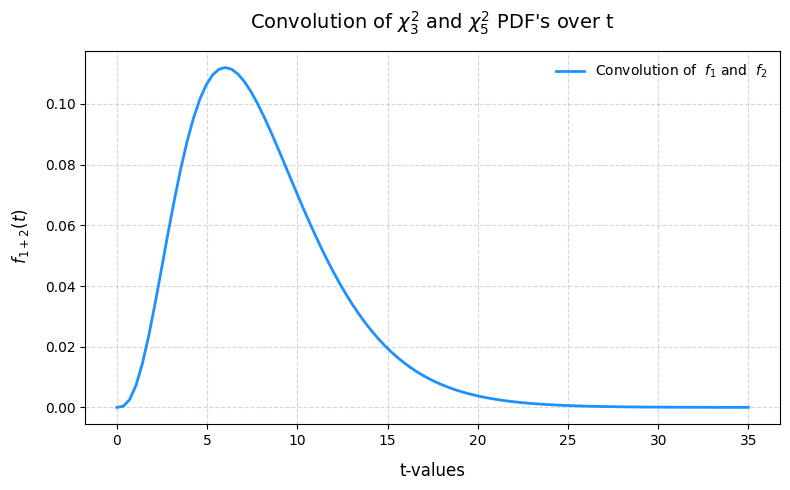

In [4]:
plt.figure(figsize=(8, 5)) 
plt.plot(ts, add_dist_vals, color="dodgerblue", linewidth=2, label="Convolution of $ \\ f_{1}$ and $ \\ f_{2}$")
 
plt.xlabel("t-values", fontsize=12, labelpad=10)
plt.ylabel("$ \\ f_{1+2}(t)$ ", fontsize=12, labelpad=10)
plt.title("Convolution of $\\chi^2_{3}$ and $\\chi^2_{5}$ PDF's over t", fontsize=14, pad=15)

plt.grid(True, linestyle="--", alpha=0.5)    
plt.legend(frameon=False, loc="upper right", fontsize=10)
 
plt.tight_layout() 
plt.show() 

In [5]:
m =3
n=5
chi_sq_3_sample = chi2.rvs(df= m, size= 10000)
chi_sq_5_sample = chi2.rvs(df= n, size= 10000)

sum_of_samples = chi_sq_3_sample + chi_sq_5_sample


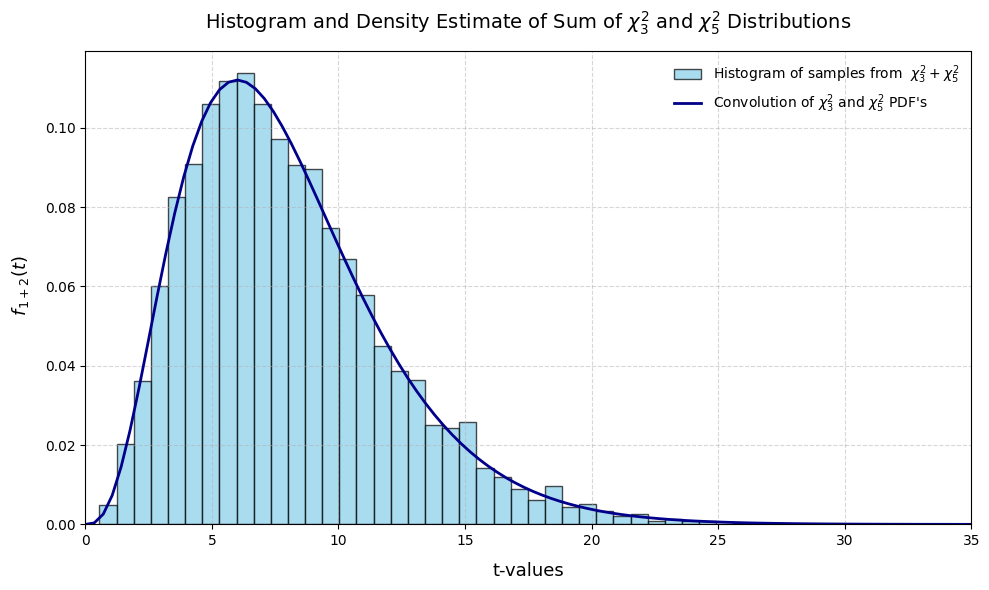

In [6]:
plt.figure(figsize=(10, 6))

plt.hist(sum_of_samples, bins= 40, density=True, color="skyblue", edgecolor="black", alpha=0.7, label="Histogram of samples from  $\\chi^2_{3} + \\chi^2_{5}$")
plt.plot(ts, add_dist_vals, color="darkblue", linewidth=2, label="Convolution of $\\chi^2_{3}$ and $\\chi^2_{5}$ PDF's")

plt.xlabel("t-values", fontsize=13, labelpad=10)
plt.ylabel("$ \\ f_{1+2}(t)$ ", fontsize=13, labelpad=10)
plt.title("Histogram and Density Estimate of Sum of $\\chi^2_{3}$ and $\\chi^2_{5}$ Distributions", fontsize=14, pad=15)

plt.xlim(0,35)
plt.legend(fontsize=10, frameon=False)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

(e) It is known that the sum $ \chi^2_{m} + \chi^2_{n} $ is a the distribution $\chi^2_{m+n}$.

 Here we will check that this is indeed the case by plotting the pdf of $ \chi^2_{m+n} $ 
in a new plot which will be side-by-side with the previous plot.

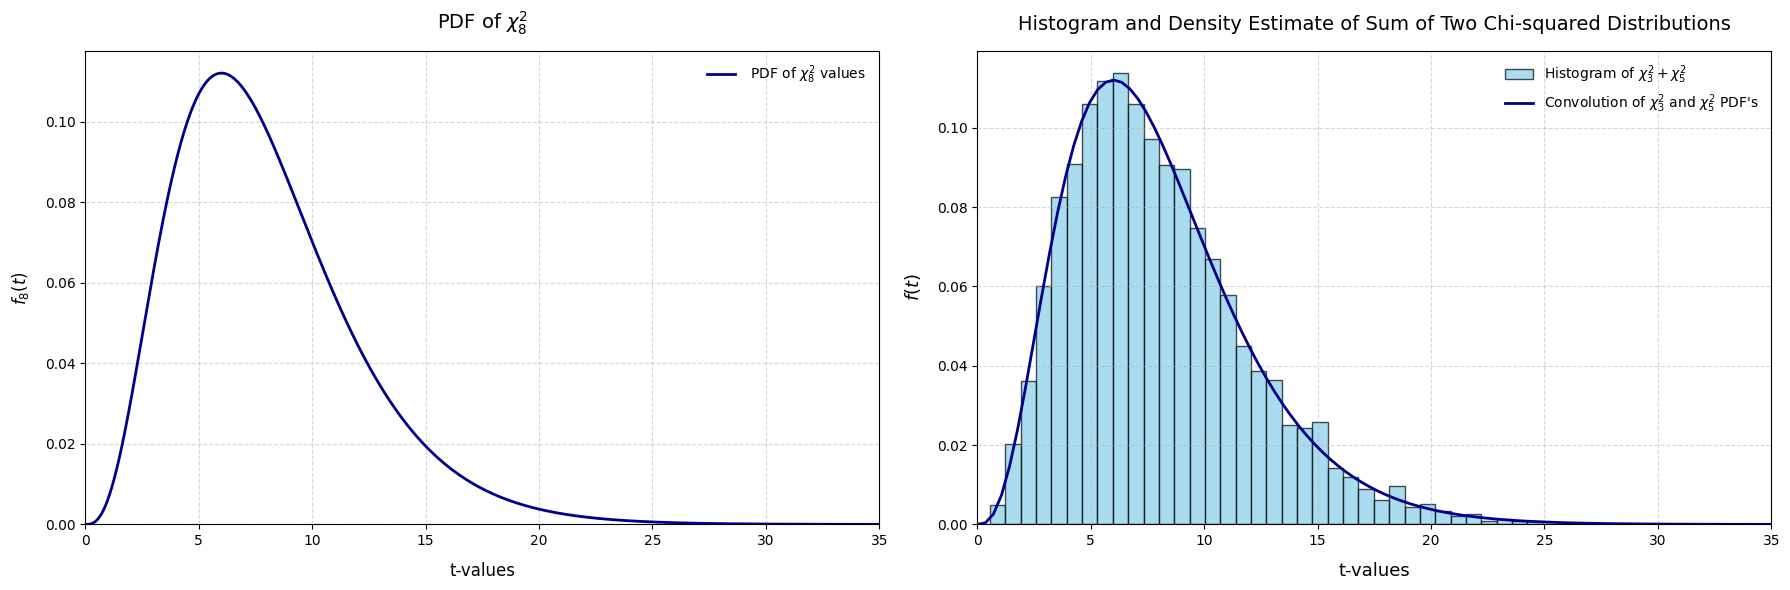

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
 
lin_mesh = np.linspace(0,35,10000) 
pdf_chi2_n_add_m = chi2.pdf(x= lin_mesh, df= n+m)

axes[0].plot(lin_mesh, pdf_chi2_n_add_m, color="darkblue", linewidth=2, label=" PDF of $\\chi^2_{8}$")

axes[0].set_xlabel("t-values", fontsize=12, labelpad=10)
axes[0].set_ylabel("$ f(t)$ ", fontsize=12, labelpad=10)
axes[0].set_title("PDF of $\\chi^2_{8}$", fontsize=14, pad=15)
axes[0].set_xlim(0,35)
axes[0].set_ylim(0,)
axes[0].grid(True, linestyle="--", alpha=0.5)   
axes[0].legend(frameon=False, loc="upper right", fontsize=10)
plt.tight_layout()

axes[1].hist(sum_of_samples, bins= 40, density=True, color="skyblue", edgecolor="black", alpha=0.7, label="Histogram of $\\chi^2_{3} + \\chi^2_{5} $")
axes[1].plot(ts, add_dist_vals, color="darkblue", linewidth=2, label="Convolution of $\\chi^2_{3}$ and $\\chi^2_{5}$ PDF's")

plt.xlabel("t-values", fontsize=13, labelpad=10)
plt.ylabel("$ f(t) $", fontsize=13, labelpad=10)
plt.title("Histogram and Density Estimate of Sum of Two Chi-squared Distributions", fontsize=14, pad=15)
plt.xlim(0,35)
plt.legend(fontsize=10, frameon=False)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

# Part 3 - Sample mean distribution 

- Here we write a function called `sample_mean_samples` taking as inputs two integers `n` and `m`. The function returns an array of length `n` containing samples each obtained by taking `m` samples from the \(\chi^2\) distribution with \(k = 3\) degrees of freedom and computing their sample mean. 

We call  
  - `sample_mean_samples(n=10, m=10000)`,  
  - `sample_mean_samples(n=100, m=10000)`, and  
  - `sample_mean_samples(n=1000, m=10000)`  
  
  and plot a histogram for each of these outputs. Essentially we are sampling from  

  $$
  \overline{ \left( \chi^2_k \right)_m } \triangleq \text{Avg}_*^m \left( \chi^2_k \otimes \cdots \otimes \chi^2_k \right) = \frac{1}{m} \sum_{i=1}^m \chi_{k}^2.
  $$



In [12]:
def sample_mean_samples(m,n):
    k= 3
    mean_list = []
    
    samples = chi2.rvs(df=k, size=(n, m))
    mean_list = samples.mean(axis=1) 
    
    return mean_list

k=3
means = sample_mean_samples(m=10, n=10000)
expected_mean = k 
samples = [sample_mean_samples(m=10, n=10000),
           sample_mean_samples(m=100, n=10000),
           sample_mean_samples(m=1000, n=10000)]

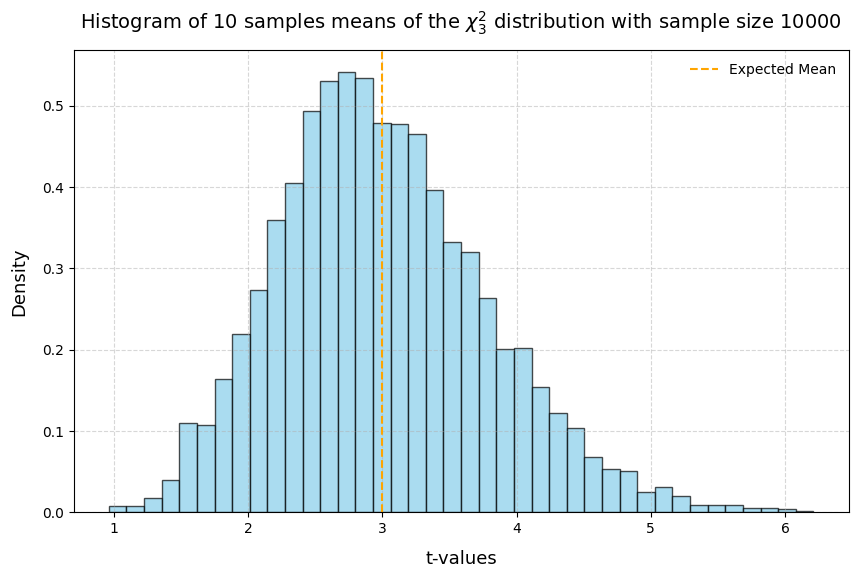

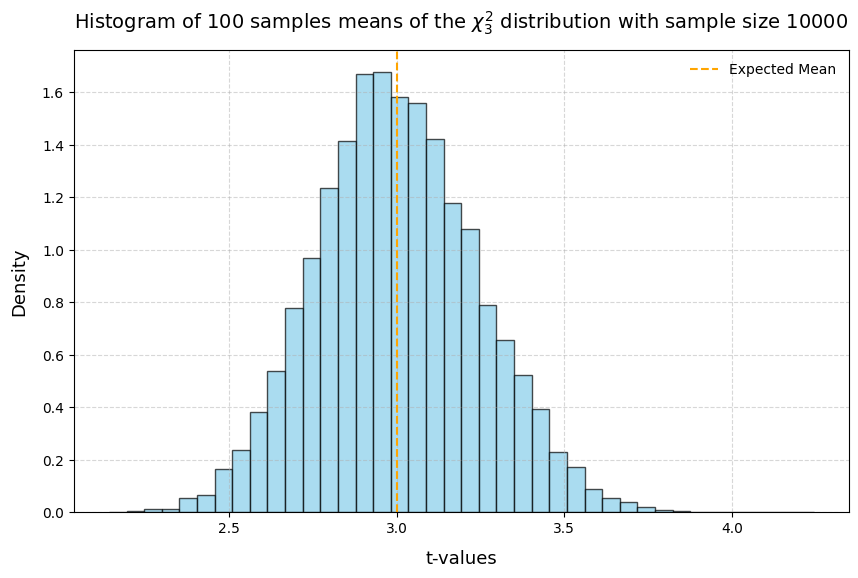

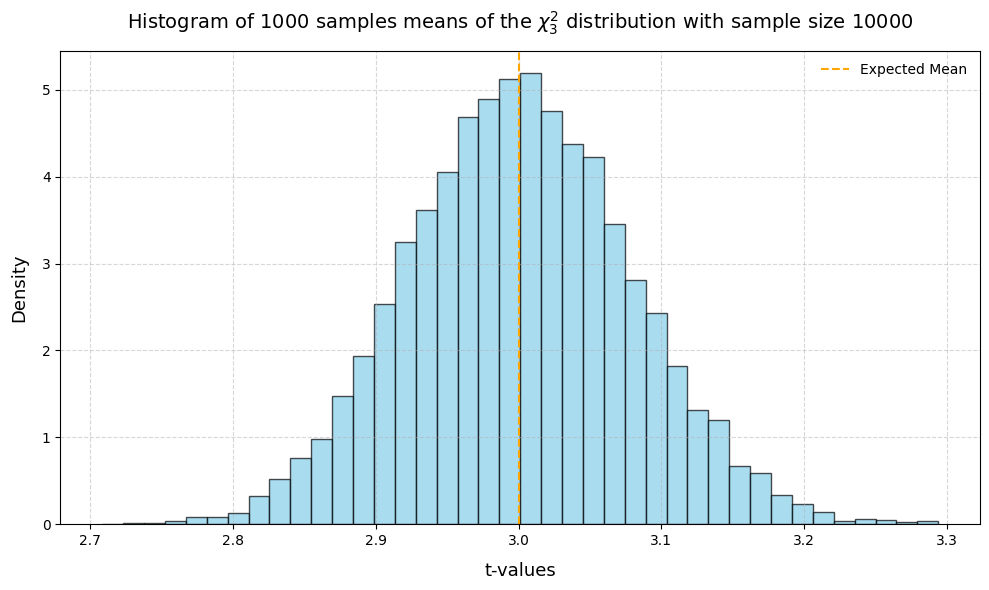

In [9]:
def plot_chi_2_3(sample_means , m):
    
    plt.figure(figsize=(10, 6))
    plt.hist(sample_means, bins=40, density=True, color="skyblue", edgecolor="black", alpha=0.7)

    plt.xlabel("t-values", fontsize=13, labelpad=10)
    plt.ylabel("Density", fontsize=13, labelpad=10)
    plt.title(f"Histogram of {m} samples means of the $\\chi^2_{3}$ distribution with sample size 10000", fontsize=14, pad=15)
    
    plt.axvline(x=expected_mean, ymin=0, linestyle='dashed', color='orange', label='Expected Mean') 

    plt.legend(fontsize=10, frameon=False)
    plt.grid(True, linestyle="--", alpha=0.5)

for i,sample in enumerate(samples):
    m = 10**(i+1)
    plot_chi_2_3(sample, m)
    

plt.tight_layout()
plt.show()


- **Distribution of sample means.** Using Part 2, we work out what the distribution of the sum of m $ \chi^2_k $ distributions with $k = 3$ degrees of freedom is. 
 
  Moreover, it is known that for a positive number $r$ , the distribution $ r \chi^2_{k}$ is given by the gamma distribution $ Gamma \left( \alpha = \frac{k}{2}, \theta = 2r \right) $.  
  
  From these two facts, explicitly compute the distribution of the $m$-sample means $\overline{ \left( \chi^2_3 \right)_m } $.
  
  
   We define a class `sample_mean_distribution` whose constructor takes an integer `m` as input and creates this distribution and instantiate the objects:  
  - `sample_mean_distribution(10)`   
  - `sample_mean_distribution(100)`   
  - `sample_mean_distribution(1000)`  
  
  and plot their PDFs. 


10


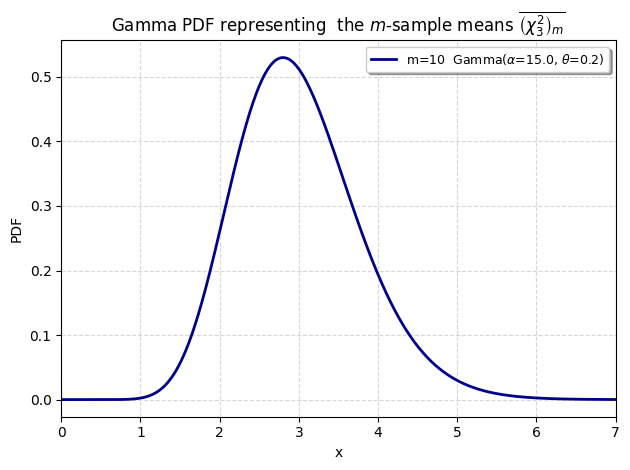

100


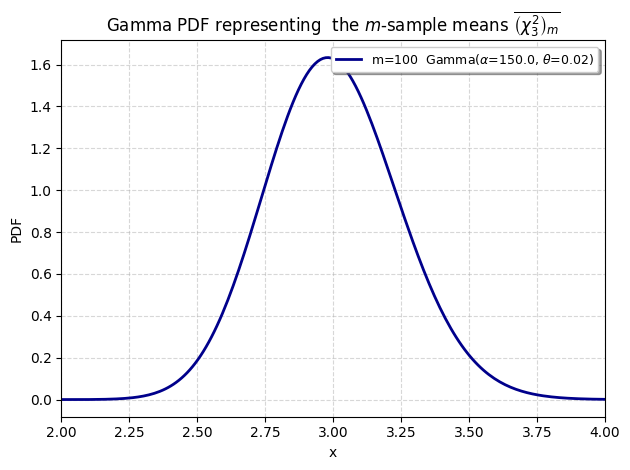

1000


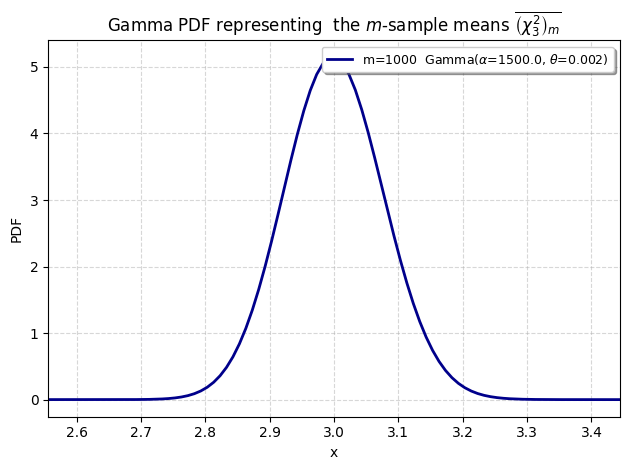

In [ ]:
class sample_mean_distribution:

    def __init__(self, m):
        self.m = m                  
        self.k = 3
    
    def calc_mean_distr(self, x):
        alpha = self.m * self.k / 2   
        theta = 2 / self.m  
    
        mean_distr = gamma.pdf(x, a= alpha, scale= theta )      
        return mean_distr
    
    def plot_pdf(self):
       
        x = np.linspace(0,10, 1000)
        alpha = self.m * self.k / 2
        theta = 2 / self.m 

        g = self.calc_mean_distr(x)

        plt.plot(x, g,  color="darkblue", linewidth=2, label=rf'm={self.m}  Gamma($ \alpha $={alpha}, $ \theta $={theta})')

        std = 1/np.log10(self.m)**2

        plt.xlim( np.max([0,3-4*std]) ,3+4*std )  #some smart fragile non generilasibale formulas to control the range of x values displayed
        plt.xlabel('x')
        plt.ylabel('PDF')
        plt.title( r'Gamma PDF representing  the $ m $-sample means $\overline{ \left( \chi^2_3 \right)_{m} } $ ')   #### ADJUST TITLE ####
        plt.legend(
            fontsize=9,             
            loc='upper right',           
            fancybox=True,           
            shadow=True,           
            borderaxespad=0.5     
        )
        plt.grid(True, linestyle="--", alpha=0.5)        
        plt.tight_layout()  

        return

s1 = sample_mean_distribution(10) 
s2 = sample_mean_distribution(100) 
s3 = sample_mean_distribution(1000) 
samples_pdf = [ sample_mean_distribution(10**i) for i in range(1,4)]

for sample in samples_pdf:
    sample.plot_pdf() 
    plt.show()

10000 10000


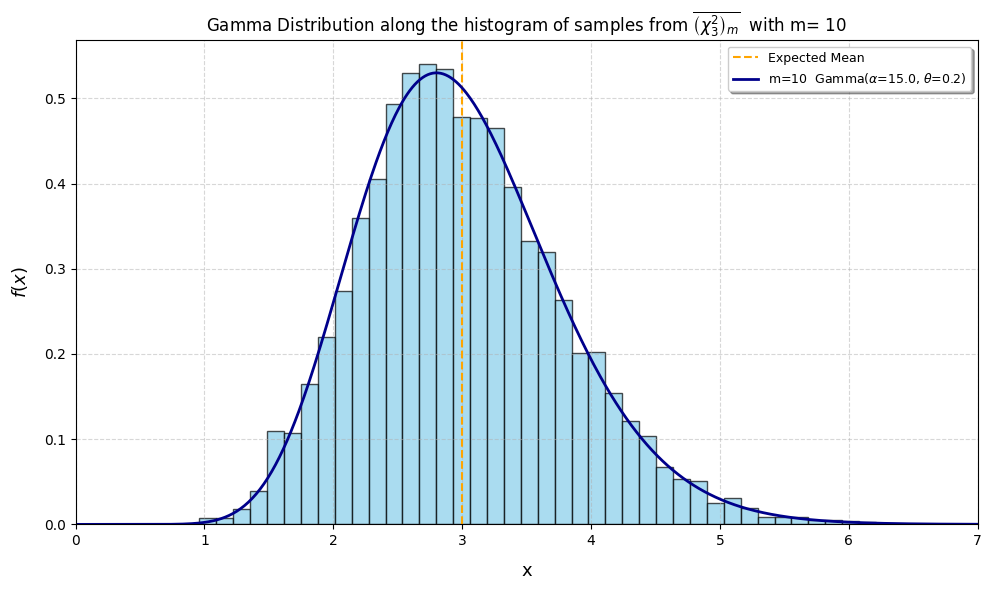

10000 10000


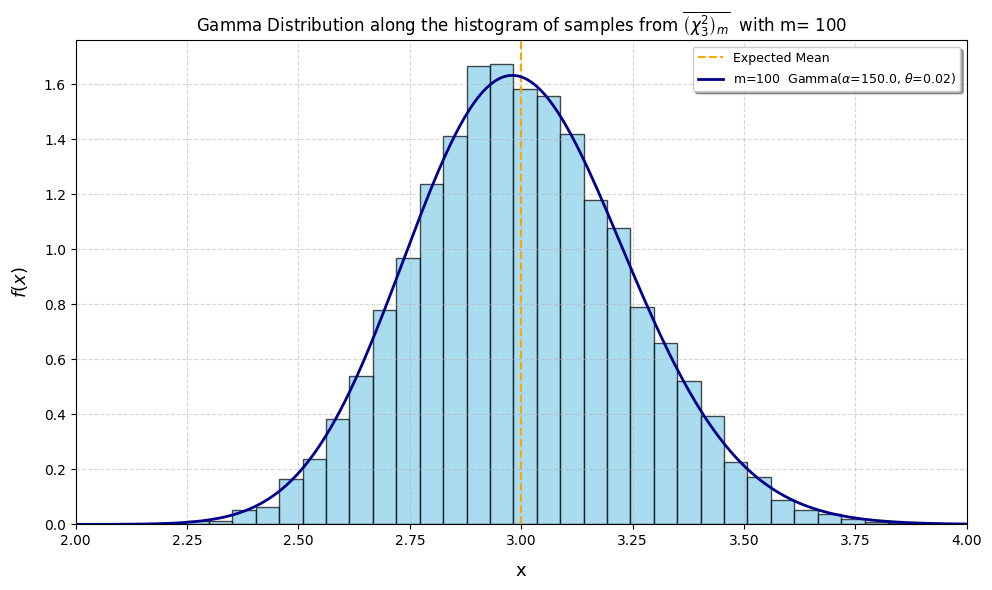

10000 10000


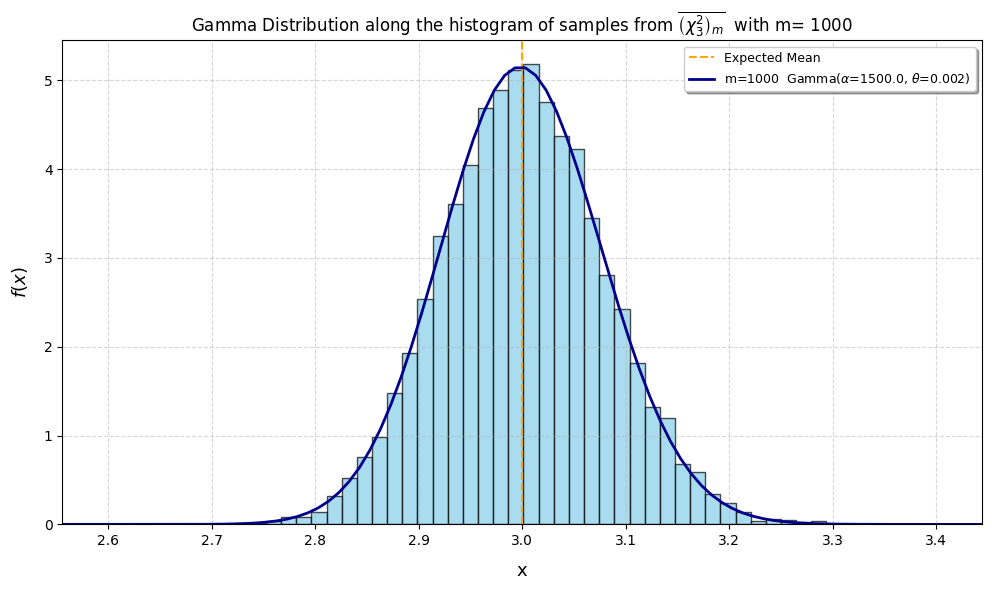

In [11]:
for hist_data,pdf_obj,i in zip(samples,samples_pdf,range(1,4)):

    x = np.linspace(0,10,10000)
    print(len(hist_data),len((pdf_obj.calc_mean_distr(x))))
    
    plot_chi_2_3(hist_data, m = '')
    pdf_obj.plot_pdf()
    plt.ylabel(r'$f(x)$')
    plt.title( r'Gamma Distribution along the histogram of samples from $\overline{ \left( \chi^2_3 \right)_{m} } $' + f'  with m= {10**i}')
    plt.show()

a) We can see that as $m$ grows, the estimator sample standard deviation gets smaller, and the sample mean estimator approaches $k$ (in our case, 3).

b) The PDFs as $ m $ grows have a smaller standard deviation, and the mean approaches $ k $ (in our case, 3).

Asymptotically, given that for a shape parameter $ \alpha $ going to infinity, a Gamma distribution converges towards a normal distribution with expectation $ \mu = \alpha \theta $ and standard deviation 
$ \sigma^2 = \alpha \theta^2 $.
The sample mean converges towards: $ N(\mu = k, \sigma = 2k/m) $.

Notice that we could have obtained the same result using the Central Limit Theorem.


c) We can clearly see from the plot that our pen-and-paper calculations, in which we derived the distribution of $ \overline{ \left( \chi^2_3 \right)_{m} } $, are correct, as we see a perfect fit on the histogram of the generated samples from $ \overline{ \left( \chi^2_3 \right)_{m} } $ and the $ \text{Gamma}( m \cdot k/2, 2/m) $ distribution.

Furthermore, we observe that as $ m \to \infty $, the $ \mu \left( \overline{ \left( \chi^2_3 \right)_{m} } \right) $ tends to $ k $.
